In [1]:
import torch
from utils import device # detects whether you are using CPU or GPU
import matplotlib.pyplot as plt
from cust_plot import plot_rewards, plot_success, plot_mu, plot_sig
import numpy as np

import glob, os

flist = glob.glob("./R09*99.pt")

reward = []
success = []
mu = []
sigma = []


n_av = 1000

for file in flist:
    print(file)
    tr_data = torch.load(file, map_location=device)
    reward_list = tr_data['rewards']
    success_list = tr_data['success']
    mu_list = tr_data['mu']
    mu_scale = abs(np.array(mu_list)).sum(axis=0)
    mu_list = mu_list / mu_scale
    sigma_list = tr_data['sig']
    sigma_list = sigma_list / mu_scale
    
    reward_mean = np.mean(reward_list[-n_av:])
    success_mean = np.mean(success_list[-n_av:])
    mu_mean = np.mean(mu_list[:][-n_av:],axis=1)
    sigma_mean = np.mean(sigma_list[:][-n_av:],axis=1)
    
    plt_data = tr_data

    reward.append(reward_mean)
    success.append(success_mean)
    mu.append(mu_mean)
    sigma.append(sigma_mean)

    

./R09_sl_ns_109_99.pt
./R09_sl_ns_19_99.pt
./R09_sl_ns_24_99.pt
./R09_sl_ns_61_99.pt
./R09_sl_ns_134_99.pt
./R09_sl_ns_6_99.pt
./R09_sl_ns_110_99.pt
./R09_sl_ns_45_99.pt
./R09_sl_ns_78_99.pt
./R09_sl_ns_85_99.pt
./R09_sl_ns_87_99.pt
./R09_sl_ns_47_99.pt
./R09_sl_ns_112_99.pt
./R09_sl_ns_157_99.pt
./R09_sl_ns_4_99.pt
./R09_sl_ns_136_99.pt
./R09_sl_ns_26_99.pt
./R09_sl_ns_63_99.pt
./R09_sl_ns_22_99.pt
./R09_sl_ns_67_99.pt
./R09_sl_ns_132_99.pt
./R09_sl_ns_83_99.pt
./R09_sl_ns_116_99.pt
./R09_sl_ns_43_99.pt
./R09_sl_ns_41_99.pt
./R09_sl_ns_2_99.pt
./R09_sl_ns_114_99.pt
./R09_sl_ns_81_99.pt
./R09_sl_ns_129_99.pt
./R09_sl_ns_39_99.pt
./R09_sl_ns_58_99.pt
./R09_sl_ns_130_99.pt
./R09_sl_ns_98_99.pt
./R09_sl_ns_20_99.pt
./R09_sl_ns_65_99.pt
./R09_sl_ns_46_99.pt
./R09_sl_ns_156_99.pt
./R09_sl_ns_113_99.pt
./R09_sl_ns_5_99.pt
./R09_sl_ns_86_99.pt
./R09_sl_ns_137_99.pt
./R09_sl_ns_62_99.pt
./R09_sl_ns_27_99.pt
./R09_sl_ns_60_99.pt
./R09_sl_ns_25_99.pt
./R09_sl_ns_135_99.pt
./R09_sl_ns_108_99.pt
.

In [2]:
#need stdev here across means of mus.
mu_very_mean = np.mean(mu,axis=0)
mu_loc_sigma = np.std(mu,axis=0)
sigma_very_mean = np.sqrt(np.mean(pow(np.array(sigma),2),axis=0))
print(mu_very_mean)
print(mu_loc_sigma)
print(sigma_very_mean)

[-0.06164451  0.08244811  0.18357935  0.17076312 -0.01069093 -0.08490724
  0.07445735 -0.05370676  0.12321114  0.055415   -0.01798722]
[0.02042347 0.02203145 0.02577176 0.02854069 0.02729166 0.02808165
 0.0259383  0.03114672 0.0315623  0.03194647 0.02620557]
[0.10101801 0.10150463 0.10389734 0.10517177 0.1013032  0.10208344
 0.10210296 0.10641806 0.1015617  0.10224958 0.10453766]


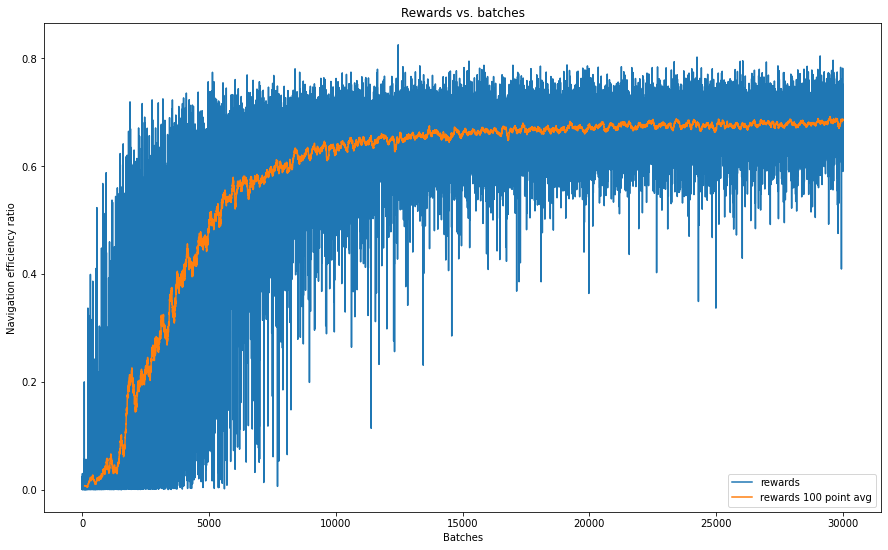

In [3]:
fig, ax = plt.subplots(figsize=(15,9))
plot_rewards(ax=ax, plt_data=plt_data, plt_avg=100)

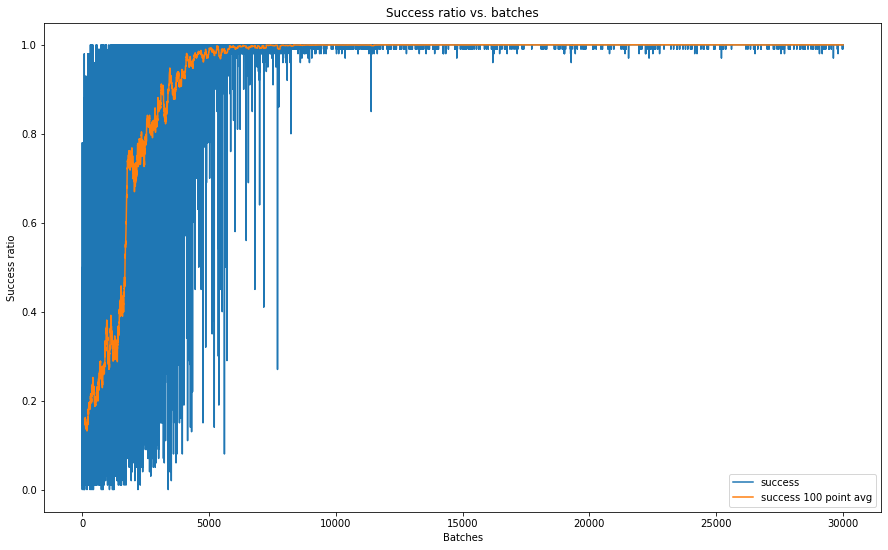

In [4]:
fig, ax = plt.subplots(figsize=(15,9))
plot_success(ax=ax, plt_data=plt_data, plt_avg=100)

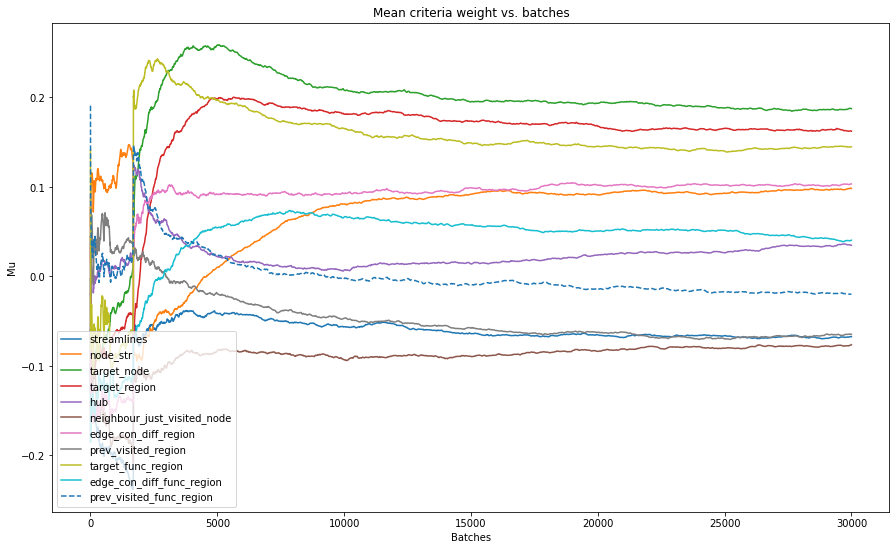

In [5]:
fig, ax = plt.subplots(figsize=(15,9))
plot_mu(ax=ax, plt_data=plt_data)

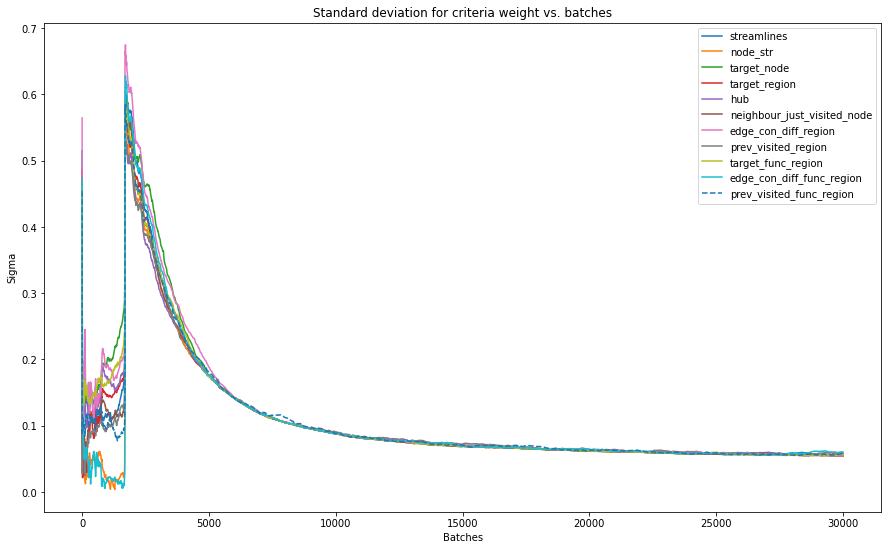

In [6]:
fig, ax = plt.subplots(figsize=(15,9))
plot_sig(ax=ax, plt_data=plt_data)